## Clean and Wrangle Data

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import pylab as pl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
merged_whr = pd.read_csv('WHR_Datasets/whr_merged.csv') 

In [4]:
merged_whr.shape #1229 rows and 12 cols

(1229, 12)

In [5]:
merged_whr.head()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [6]:
merged_whr.tail()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
1224,141,142,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,142,143,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022
1228,145,146,Afghanistan,Southern Asia,"2,404","0,758","0,000","0,289","0,000","0,005","0,089",2022


In [7]:
merged_whr.info() 

#to-do: 
#1. check missing values
#2. drop Unnamed col
#3. replace col names
#4. replace commas with periods
#5. change datatype from object to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB


In [8]:
merged_whr.isnull().sum() # cleaned data without missing values

Unnamed: 0                       0
Happiness Rank                   0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [12]:
merged_whr = merged_whr.drop(['Unnamed: 0'], axis=1) # drop col "Unnamed: 0"

In [13]:
# change column names
merged_whr = merged_whr.rename(columns={'Economy (GDP per Capita)':'Economy', 
                                        'Family (Social Support)':'Social Support',
                                        'Health (Life Expectancy)':'Health',
                                        'Trust (Government Corruption)':'Absence of Corruption'})

merged_whr

,Happiness Rank,Country,Region,Happiness Score,Economy,Social Support,Health,Freedom,Corruption,Generosity,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...
1224,142,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,143,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


In [24]:
col_names = merged_whr.columns.to_list()
col_names

['Happiness Rank',
 'Country',
 'Region',
 'Happiness Score',
 'Economy',
 'Social Support',
 'Health',
 'Freedom',
 'Corruption',
 'Generosity',
 'Year']

In [26]:
col_to_float = col_names[3:10]
col_to_float

['Happiness Score',
 'Economy',
 'Social Support',
 'Health',
 'Freedom',
 'Corruption',
 'Generosity']

In [27]:
def replace_comma(df, col_name):
    for idx in range(len(df[col_name])):
        df[col_name][idx] = df[col_name][idx].replace(",", ".")
        
    return df[col_name]

In [28]:
for col_name in col_to_float:
    replace_comma(merged_whr, col_name)

/var/folders/ph/5s8lb5y90zq6_3_rmws41nw00000gn/T/ipykernel_950/3227002703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][idx] = df[col_name][idx].replace(",", ".")


In [29]:
merged_whr.tail() # looks like commas are subbed with periods

,Happiness Rank,Country,Region,Happiness Score,Economy,Social Support,Health,Freedom,Corruption,Generosity,Year
1224,142,Botswana*,-,3.471,1.503,0.815,0.280,0.571,0.102,0.012,2022
1225,143,Rwanda*,-,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
1226,144,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
1227,145,Lebanon,Middle East and Northern Africa,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022
1228,146,Afghanistan,Southern Asia,2.404,0.758,0.000,0.289,0.000,0.005,0.089,2022


In [30]:
# change col datatype from object to float
for col_name in col_to_float:
    merged_whr[col_name] = merged_whr[col_name].astype(float)


In [31]:
merged_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Happiness Rank   1229 non-null   int64  
 1   Country          1229 non-null   object 
 2   Region           1229 non-null   object 
 3   Happiness Score  1229 non-null   float64
 4   Economy          1229 non-null   float64
 5   Social Support   1229 non-null   float64
 6   Health           1229 non-null   float64
 7   Freedom          1229 non-null   float64
 8   Corruption       1229 non-null   float64
 9   Generosity       1229 non-null   float64
 10  Year             1229 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 105.7+ KB


In [53]:
merged_whr.describe()

,Happiness Rank,Happiness Score,Economy,Social Support,Health,Freedom,Corruption,Generosity,Year
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,77.468674,5.428998,0.975343,1.033193,0.608082,0.440960,0.130756,0.201595,2018.447518
std,44.474181,1.115155,0.434249,0.329578,0.241340,0.154412,0.110818,0.115568,2.283610
min,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.000000,4.584000,0.668000,0.828000,0.439000,0.345000,0.056000,0.118000,2016.000000
50%,77.000000,5.410000,1.012160,1.069336,0.639333,0.459000,0.096000,0.187000,2018.000000
75%,116.000000,6.223000,1.295843,1.273850,0.790810,0.559000,0.164000,0.258538,2020.000000
max,158.000000,7.842000,2.209000,1.644000,1.141000,0.740000,0.587000,0.838075,2022.000000


In [41]:
merged_whr['Country'].nunique()

195

In [43]:
sorted(merged_whr['Country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Azerbaijan*',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belarus*',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Botswana*',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chad*',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Comoros*',
 'Congo',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini, Kingdom of*',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Gambia*',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guatemala*',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hong Kong S.A.R. of China',
 'Hong Kong S.A.R., China',
 'Hungary',

In [ ]:
# merged_whr[merged_whr['Year'] == 2022]

## Visualizations

Text(0.5, 1.0, 'Histogram of Happiness Score')

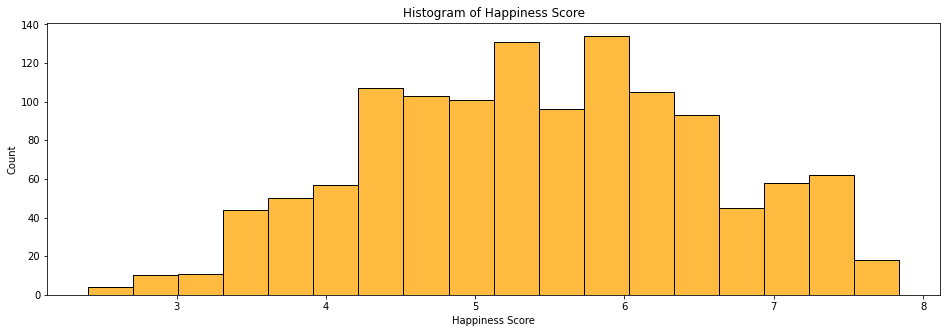

In [39]:
# Histogram of Happiness Score
f1, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.histplot(merged_whr["Happiness Score"], color="orange",ax = axes)
plt.title("Histogram of Happiness Score")

Text(0.5, 1.0, 'Histogram of Economy')

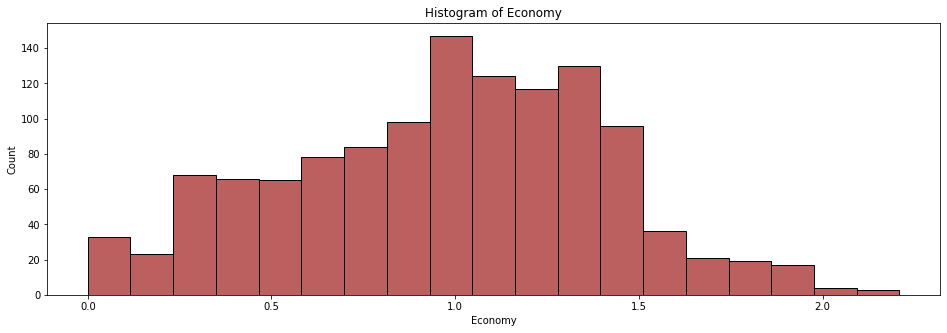

In [45]:
# Histogram of Economy
f2, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.histplot(merged_whr["Economy"], color="brown",ax = axes)
plt.title("Histogram of Economy")

Text(0.5, 1.0, 'Histogram of Social Support')

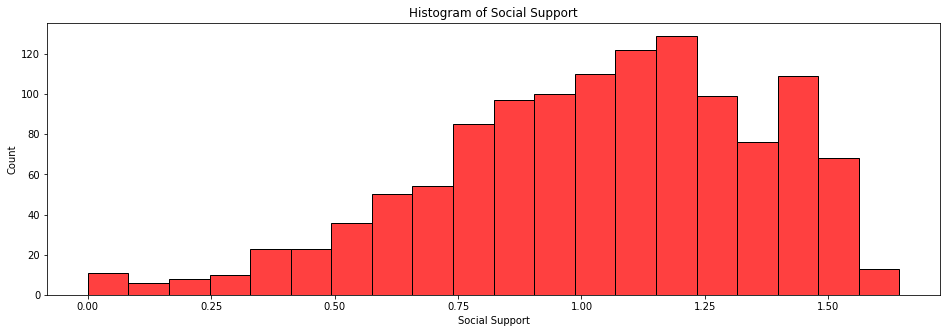

In [47]:
# Histogram of Social Support
f3, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.histplot(merged_whr["Social Support"], color="red",ax = axes)
plt.title("Histogram of Social Support")

Text(0.5, 1.0, 'Histogram of Freedom')

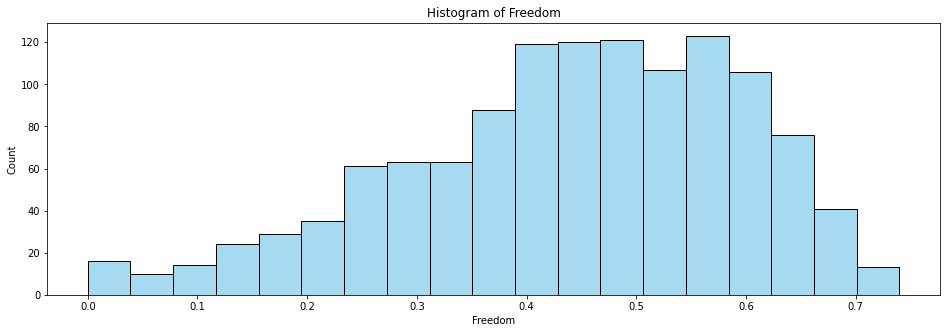

In [50]:
# Histogram of Freedom
f4, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.histplot(merged_whr["Freedom"], color="skyblue",ax = axes)
plt.title("Histogram of Freedom")

Text(0.5, 1.0, 'Histogram of Corruption')

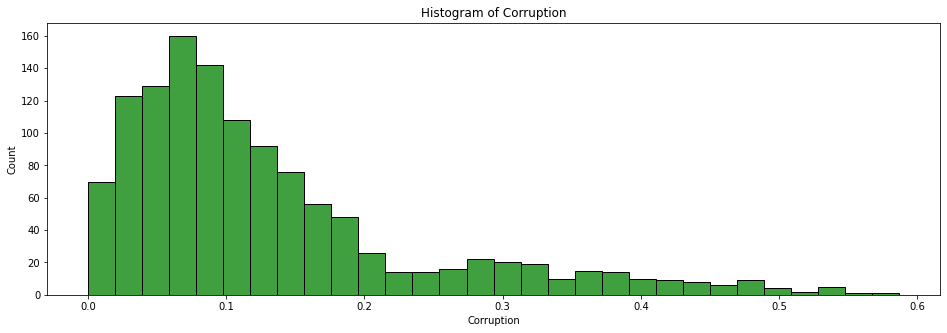

In [51]:
# Histogram of Absence of Corruption
f5, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.histplot(merged_whr["Corruption"], color="green",ax = axes)
plt.title("Histogram of Corruption")

Text(0.5, 1.0, 'Histogram of Health')

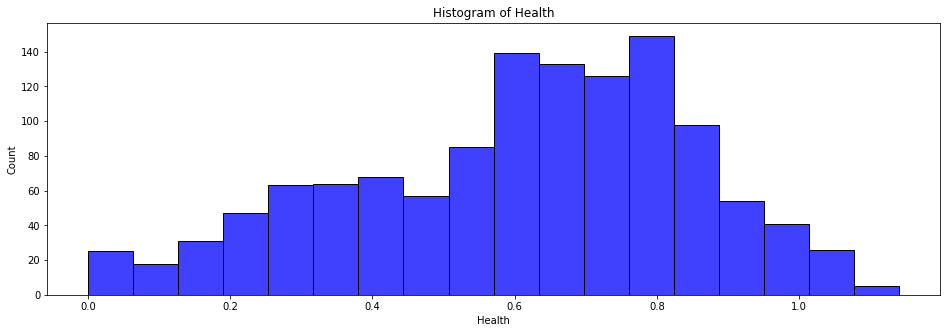

In [52]:
# Histogram of Health
f6, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.histplot(merged_whr["Health"], color="blue",ax = axes)
plt.title("Histogram of Health")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


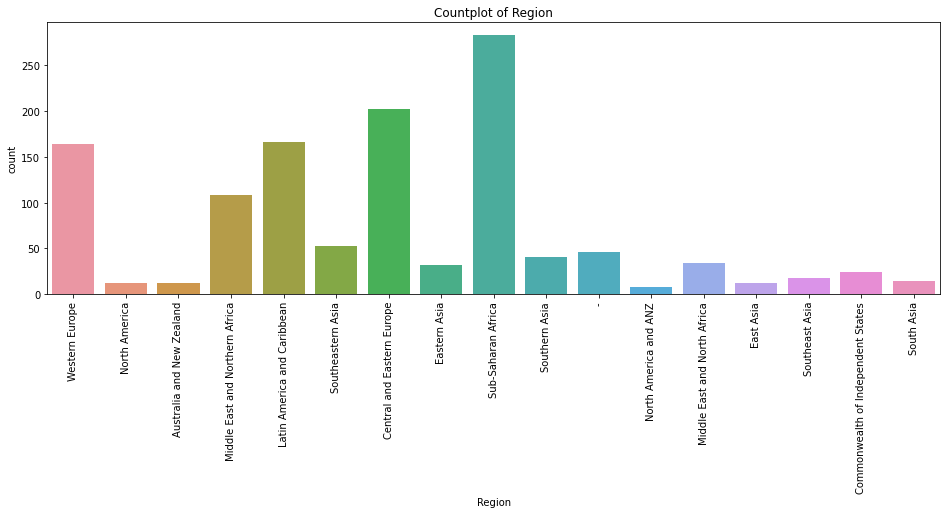

In [68]:
# Countplot of region
f7, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.countplot(merged_whr["Region"])
plt.title("Countplot of Region")
plt.xticks(rotation = 90)
plt.show()

## Multivariate Visualizations

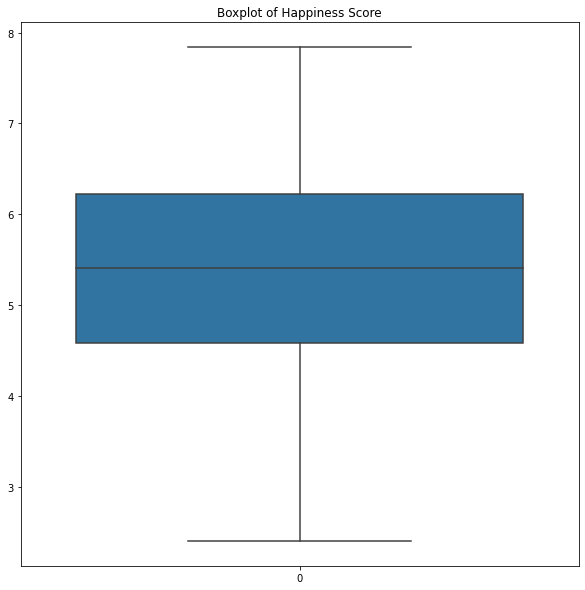

In [71]:
f8, axes = plt.subplots(1,1, figsize = (10, 10))
g1 = sns.boxplot(data = merged_whr.loc[:, "Happiness Score"], orient = "v")
plt.title("Boxplot of Happiness Score")
plt.show()

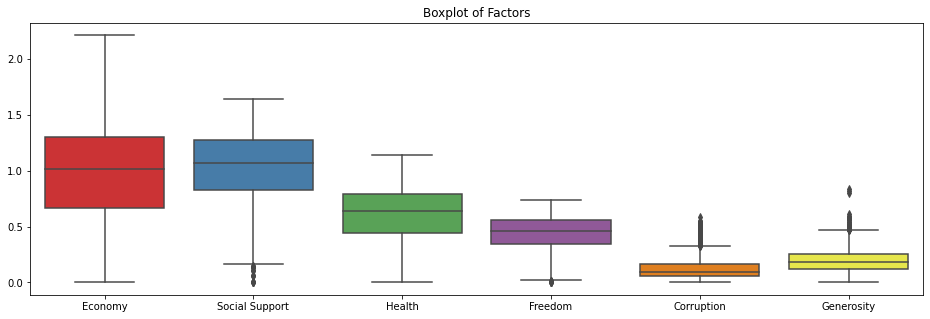

In [64]:
# boxplot of variables
f9, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.boxplot(data = merged_whr.loc[:, col_names[4:-1]], orient = "v", palette = "Set1")
plt.title("Boxplot of Factors")
plt.show()

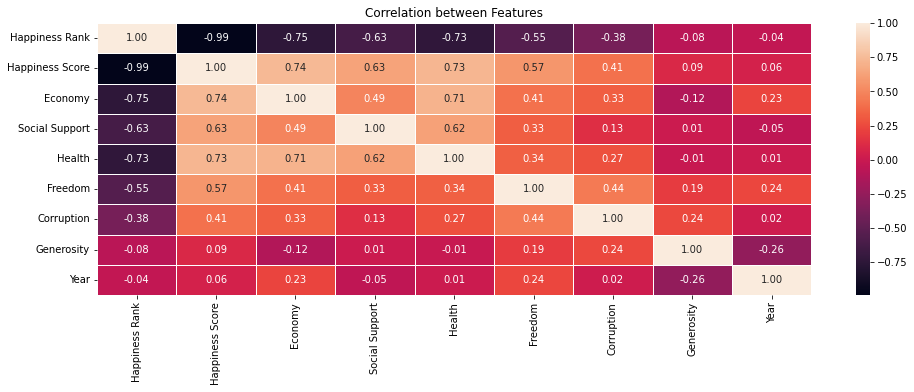

In [72]:
# Correlation heatmap of features
f10, axes = plt.subplots(1,1, figsize = (16, 5))
sns.heatmap(merged_whr.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Correlation between Features")
plt.show()